In [1]:
!pip install tensorflow tensorflow-datasets ipywidgets

  Using cached tensorflow_datasets-4.9.8-py3-none-any.whl.metadata (11 kB)
  Using cached dm_tree-0.1.9-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached simple_parsing-0.1.7-py3-none-any.whl.metadata (7.3 kB)
  Using cached tensorflow_metadata-1.16.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached einops-0.8.1-py3-none-any.whl.metadata (13 kB)
  Using cached docstring_parser-0.16-py3-none-any.whl.metadata (3.0 kB)
Using cached tensorflow_datasets-4.9.8-py3-none-any.whl (5.3 MB)
Using cached dm_tree-0.1.9-cp312-cp312-win_amd64.whl (102 kB)
Using cached simple_parsing-0.1.7-py3-none-any.whl (112 kB)
Using cached tensorflow_metadata-1.16.1-py3-none-any.whl (28 kB)
Using cached docstring_parser-0.16-py3-none-any.whl (36 kB)
Using cached einops-0.8.1-py3-none-any.whl (64 kB)


In [2]:
import tensorflow as tf

In [3]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [4]:
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\sarth\tensorflow_datasets\fashion_mnist\incomplete.1JQ6U8_3.0.1\fashion_mnist-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\sarth\tensorflow_datasets\fashion_mnist\incomplete.1JQ6U8_3.0.1\fashion_mnist-test.tfrecord…

Dataset fashion_mnist downloaded and prepared to C:\Users\sarth\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


TensorFlow does not return the whole dataset, it return a pipeline by which we can make calls to call batches of data

In [5]:
ds.as_numpy_iterator().next()['label']

np.int64(2)

## Visualize the dataset

In [6]:
# Data Transformation
import numpy as np

In [7]:
# Build a iterator
dataIterator = ds.as_numpy_iterator()

In [8]:
# Bring back new dataset everytime it runs
dataIterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

It is not loading whole data but making calls to get batch of data which hepls to preserve our machine memory

In [9]:
dataIterator.next()['image'].shape

(28, 28, 1)

In [11]:
np.squeeze(dataIterator.next()['image']).shape

(28, 28)

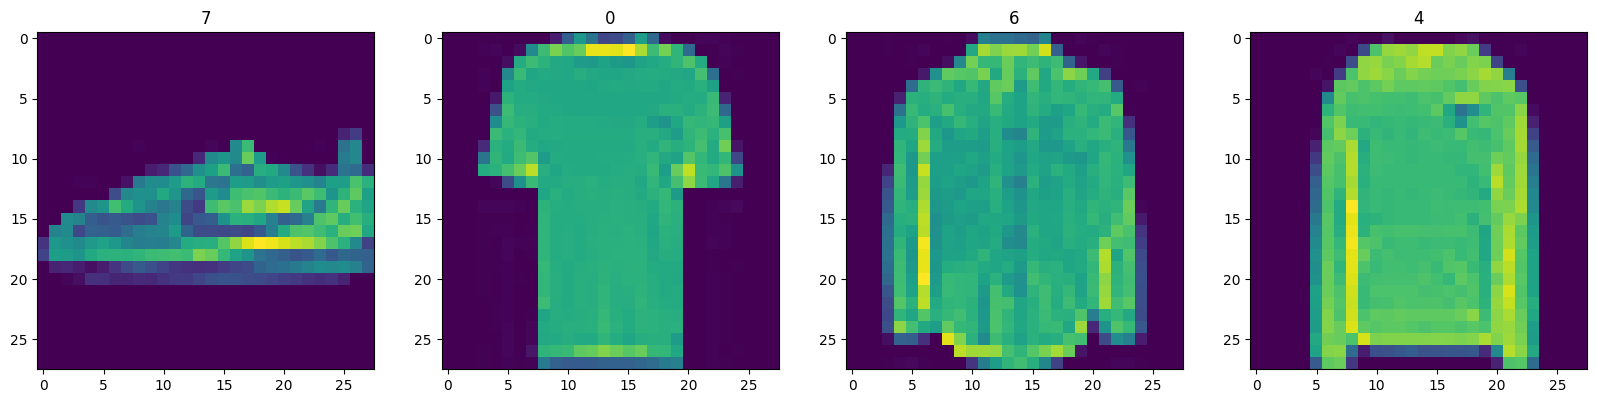

In [20]:
# Create Subplots
# Setup format of subplots
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop 4 times to get images
for idx in range(4):
    # Grab image and label
    sample = dataIterator.next()
    # Plot image of specfic subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    # Image label as title
    ax[idx].title.set_text(sample['label'])

In [22]:
# Scale images Only
def scale_images(data):
    image = data['image']
    return image / 255

In [ ]:
# map -> cache -> shuffle -> batch -> prefetch
# to build data pipeline for tensor flow

# Reload Dataset
ds = tfds.load('fashion_mnist', split='train')
# Running the dataset through scale_images function 
ds = ds.map(scale_images)
# Cache the dataset for that batch
ds = ds.cache()
# Shuffle 
ds = ds.shuffle(60000)
# BAtch into 128 images per sample
ds = ds.batch(128)
# Eleminates(Redeuce) bottlenecking
ds = ds.prefetch(64)

In [24]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Build Neural Network 

Import Modelling Components

In [ ]:
# Bring Sequential API for generator and discriminator
from tensorflow.keras.models import Sequential
# Import Layers for neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

Build Generator

In [ ]:
def build_generator():
    model = Sequential()

    # Input 128 images to tell what to generate and it will generate randomly
    # Reshapes random values to 7x7x128 -- Beginning of generated image
    # 128 (input dims) latent space
    model.add(Dense(7*7*128, input_dim=128))
    # Introduce Non-Linearity
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    # Upsampling Block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Upsampling Block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))

    # Conv layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))

    return model

In [44]:
generator = build_generator()

c:\Users\sarth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
generator.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 6272)           │       809,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 1)      │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


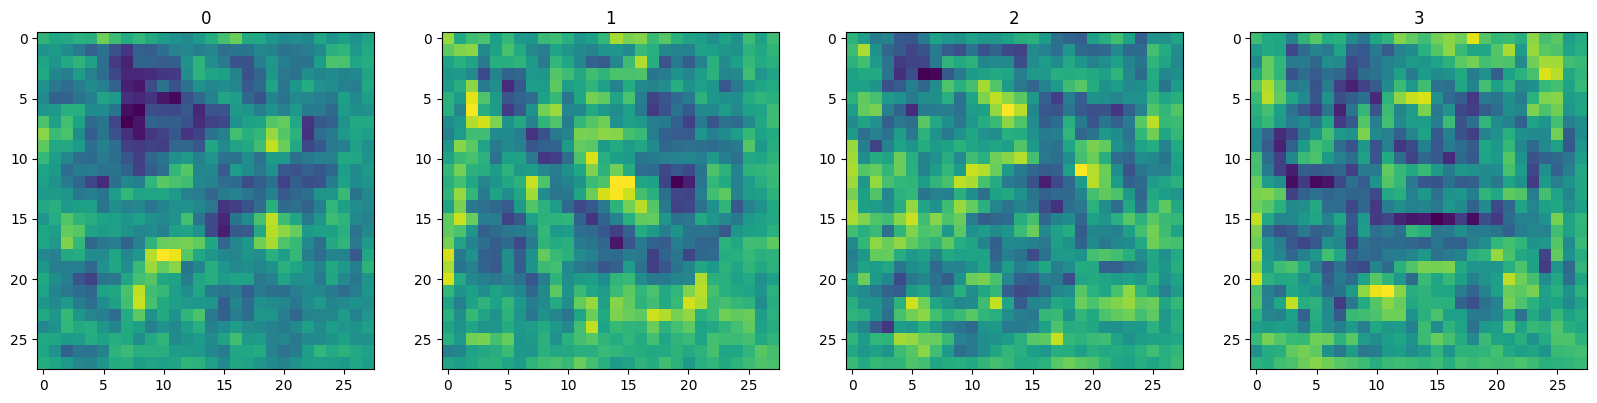

In [51]:
# Generate new images
img = generator.predict(np.random.randn(4,128,1))
# Create Subplots
# Setup format of subplots
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(img):
    # Plot image of specfic subplot
    ax[idx].imshow(np.squeeze(img))
    # Image label as title
    ax[idx].title.set_text(idx)

Build Discriminator

In [ ]:
def build_discriminator():
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Flatten and pass through dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    # 1 - Fake 0 - Real
    model.add(Dense(1, activation='sigmoid'))

    return model


In [72]:
discriminator = build_discriminator()

c:\Users\sarth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
discriminator.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_27 (LeakyReLU)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 20, 20, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_28 (LeakyReLU)      │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_29 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 12, 12, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_30 (LeakyReLU)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │        36,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
img = generator.predict(np.random.randn(4,128,1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [76]:
img.shape

(4, 28, 28, 1)

In [79]:
# discriminator.predict(generator.predict(np.random.randn(4,128,1)))
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0.5004035 ],
       [0.5003737 ],
       [0.50050795],
       [0.5005876 ]], dtype=float32)

# Construct Training Loop